In [6]:
import numpy as np 
import pandas as pd 

In [7]:
# 这里是github code挑出的cols，我只用了dtypes的部分
str_type = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5',
            'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
            'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

# fisrt 53 columns
cols = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
        'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
        'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
        'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
        'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
        'M5', 'M6', 'M7', 'M8', 'M9']

# V COLUMNS TO LOAD DECIDED BY CORRELATION EDA
# https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id
v = [1, 3, 4, 6, 8, 11]
v += [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
v += [76, 78, 80, 82, 86, 88, 89, 91]

# v += [96, 98, 99, 104] #relates to groups, no NAN
v += [107, 108, 111, 115, 117, 120, 121, 123]  # maybe group, no NAN
v += [124, 127, 129, 130, 136]  # relates to groups, no NAN

# LOTS OF NAN BELOW
v += [138, 139, 142, 147, 156, 162]  # b1
v += [165, 160, 166]  # b1
v += [178, 176, 173, 182]  # b2
v += [187, 203, 205, 207, 215]  # b2
v += [169, 171, 175, 180, 185, 188, 198, 210, 209]  # b2
v += [218, 223, 224, 226, 228, 229, 235]  # b3
v += [240, 258, 257, 253, 252, 260, 261]  # b3
v += [264, 266, 267, 274, 277]  # b3
v += [220, 221, 234, 238, 250, 271]  # b3

v += [294, 284, 285, 286, 291, 297]  # relates to grous, no NAN
v += [303, 305, 307, 309, 310, 320]  # relates to groups, no NAN
v += [281, 283, 289, 296, 301, 314]  # relates to groups, no NAN
# v += [332, 325, 335, 338] # b4 lots NAN

#cols += ['V' + str(x) for x in v]
dtypes = {}
for c in cols + ['id_0' + str(x) for x in range(1, 10)] + ['id_' + str(x) for x in range(10, 34)]:
    dtypes[c] = 'float32'
for c in str_type:
    dtypes[c] = 'category'

In [11]:
# load data
import os
import pickle
PROJECT_DIR = os.path.abspath('.')
DATA_DIR = os.path.join(PROJECT_DIR, 'data')

path_train_transaction = os.path.join(DATA_DIR, 'train_transaction.csv')
path_train_identity = os.path.join(DATA_DIR, 'train_identity.csv')
path_test_transaction = os.path.join(DATA_DIR, 'test_transaction.csv')
path_test_identity = os.path.join(DATA_DIR, 'test_identity.csv')

train_trans = pd.read_csv(path_train_transaction, index_col="TransactionID", dtype=dtypes)
train_id = pd.read_csv(path_train_identity, index_col="TransactionID",dtype=dtypes)
X_train = train_trans.merge(train_id, how="left", left_index=True, right_index=True)

test_trans = pd.read_csv(path_test_transaction, index_col="TransactionID", dtype=dtypes)
test_id = pd.read_csv(path_test_identity, index_col="TransactionID",dtype=dtypes)
X_test = test_trans.merge(test_id, how="left", left_index=True, right_index=True)

In [12]:
import os
import pickle
PROJECT_DIR = os.path.abspath('.')
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
with open(os.path.join(DATA_DIR, 'train.pkl'), 'rb') as f:
    train_df_ = pickle.load(f)
    
with open(os.path.join(DATA_DIR, 'test.pkl'), 'rb') as f:
    test_df_ = pickle.load(f)

KeyboardInterrupt: 

In [5]:
train_df_.shape

(590540, 432)

In [13]:
# target
y_train = X_train["isFraud"]
X_train = X_train.drop(columns = ['isFraud'])

In [14]:
# change test set id-01 to id_01
train_id_col1 = [f'id_0{i}' for i in range(1, 10)] 
train_id_col2 = [f'id_{i}' for i in range(10, 39)] 
train_id_col = train_id_col1+train_id_col2

test_id_col1 = [f'id-0{i}' for i in range(1, 10)] 
test_id_col2 = [f'id-{i}' for i in range(10, 39)] 
test_id_col = test_id_col1+test_id_col2


new_names = train_id_col
old_names = test_id_col
rename_dict = {old_names[i]: new_names[i] for i in range(len(new_names))}

X_test.rename(columns = rename_dict, inplace=True)

In [15]:
# merge to a full dataset and drop the v columns first

full_data = pd.concat([X_train,X_test])
#v_cols = [f'V{i}' for i in range(1, 340)] 
#X_train = X_train.drop(columns=v_cols)

## Dependency Check to fill NA

In [28]:
# check percentage of null values
pd.set_option('display.max_rows', 500)
null_perc = pd.DataFrame(full_data.isnull().sum()/full_data.shape[0]).reset_index()
null_perc.rename(columns = {'index':'columns', 0:'null_perc'}, inplace=True)
null_perc

,columns,null_perc
0,TransactionDT,0.000000
1,TransactionAmt,0.000000
2,ProductCD,0.000000
3,card1,0.000000
4,card2,0.016029
5,card3,0.004162
6,card4,0.004250
7,card5,0.008026
8,card6,0.004172
9,addr1,0.119679


In [36]:
def check_dependency(independent_var, dependent_var):
    
    independent_uniques = []
    temp_df = pd.concat([X_train[[independent_var, dependent_var]], X_test[[independent_var, dependent_var]]])
    
    for value in temp_df[independent_var].unique():
        independent_uniques.append(temp_df[temp_df[independent_var] == value][dependent_var].value_counts().shape[0])

    values = pd.Series(data=independent_uniques, index=temp_df[independent_var].unique())
    
    N = len(values)
    N_dependent = len(values[values == 1])
    N_notdependent = len(values[values > 1])
    N_null = len(values[values == 0])
    
    #print(f'In {independent_var}, there are {N} unique values')
    #print(f'{N_dependent}/{N} have one unique {dependent_var} value')
    #print(f'{N_notdependent}/{N} have more than one unique {dependent_var} values')
    #print(f'{N_null}/{N} have only missing {dependent_var} values\n')
    
    return N_dependent/N, N_notdependent/N, N_null/N

In [33]:
# create lists for different vars
c_cols = [f'C{i}' for i in range(1, 15)] 
m_cols = [f'M{i}' for i in range(1, 10)] 
card_cols = [f'card{i}' for i in range(1, 7)]

# to check the dependency, I only chose c1-c14 and card1-6
cols = c_cols + card_cols + ['R_emaildomain','P_emaildomain']

In [18]:
df = full_data[cols]

# Use itertools to optimize
import itertools 
import time

st = time.time()

col_pairs = list(itertools.permutations(df.columns,2))
dependency = []
for col1, col2 in col_pairs:
    perc1, perc2, perc3 = check_dependency(col1, col2)
    dependency.append([col1, col2, perc1, perc2, perc3])

print('runtime = ',time.time()-st)
#from itertools import starmap
#generator = ((cols[0],cols[1],d) for cols in itertools.permutations(X_train.columns[:5],2) for d in starmap(check_dependency, [cols]))
#for i in generator:
#    print(i)

runtime =  1640.0018281936646


In [22]:
from itertools import starmap
st = time.time()
generator = ((cols[0],cols[1],a,b,c) for cols in itertools.permutations(df.columns,2) 
                                     for a,b,c in starmap(check_dependency, [cols]))
dependency = []
for i in generator:
    dependency.append(i)
starmap_runtime = time.time()-st
print('runtime = ',starmap_runtime)  

runtime =  1607.2607369422913


In [38]:
st = time.time()
dependency1 = []
for i in range(len(cols)):
    for j in range(len(cols)):
        if cols[i]!= cols[j]:
            perc1, perc2, perc3 = check_dependency(cols[i], cols[j])
            dependency1.append([cols[i], cols[j], perc1, perc2, perc3])

loop_runtime = time.time()-st
print('runtime = ',loop_runtime)

runtime =  1638.9131581783295


In [53]:
depend_table = pd.DataFrame(dependency1, columns = ['indep variable','dep variable','only 1 uniq%','>1 unique%','only missing' ])
table = depend_table.merge(null_perc,left_on='dep variable', right_on='columns').drop(['columns'],axis=1).sort_values(by=['indep variable'],ascending=True)
table

,indep variable,dep variable,only 1 uniq%,>1 unique%,only missing,null_perc
0,C1,C2,0.523309,0.476234,0.000457,0.000003
315,C1,card3,0.644424,0.355119,0.000457,0.004162
42,C1,C4,0.547532,0.452011,0.000457,0.000003
252,C1,C14,0.537477,0.462066,0.000457,0.000003
63,C1,C5,0.807587,0.191956,0.000457,0.000003
231,C1,C13,0.509141,0.490402,0.000457,0.004327
336,C1,card4,0.000000,1.000000,0.000000,0.004250
84,C1,C6,0.542048,0.457495,0.000457,0.000003
273,C1,card1,0.479433,0.520110,0.000457,0.000000
210,C1,C12,0.569470,0.430073,0.000457,0.000003


In [55]:
table[(table['indep variable']=='card1') & (table['dep variable'].isin(card_cols))].sort_values(by=['dep variable'],ascending=True)

,indep variable,dep variable,only 1 uniq%,>1 unique%,only missing,null_perc
308,card1,card2,0.952197,0.017319,0.030484,0.016029
329,card1,card3,0.996314,0.001697,0.001989,0.004162
350,card1,card4,0.000000,1.000000,0.000000,0.004250
371,card1,card5,0.966649,0.017963,0.015388,0.008026
392,card1,card6,0.988708,0.009245,0.002048,0.004172


### Result: fill NA for card23456 and some C cols
To get the fillna data, only need to run this part

In [124]:
X_test['C3'] = X_test['C3'].fillna(0)
X_test['C5'] = X_test['C5'].fillna(0)
X_test['C7'] = X_test['C7'].fillna(0)
X_test['C9'] = X_test['C9'].fillna(0)

In [125]:
def fill_card(full_df):
    ## we will drop very rare cards
    full_df['card6'] = np.where(full_df['card6']==30, np.nan, full_df['card6'])
    full_df['card6'] = np.where(full_df['card6']==16, np.nan, full_df['card6'])

    i_cols = ['card2','card3','card4','card5','card6']
    ## We will find best match for nan values and fill with it
    for col in i_cols:
        temp_df = full_df.groupby(['card1',col])[col].agg(['count']).reset_index()
        temp_df = temp_df.sort_values(by=['card1','count'], ascending=False).reset_index(drop=True)
        del temp_df['count']
        temp_df = temp_df.drop_duplicates(keep='first').reset_index(drop=True)
        temp_df.index = temp_df['card1'].values
        temp_df = temp_df[col].to_dict()
        # create a dictionary with unique card1 value as key and col value as value so missing col can be fitted by looking at its corresponding value from card1 
        full_df[col] = np.where(full_df[col].isna(), full_df['card1'].map(temp_df), full_df[col])
        
    return full_df

In [126]:
X_train = fill_card(X_train)
X_test = fill_card(X_test)

### replace NA with -999

In [127]:
X_train = X_train.replace(np.nan, -1)
X_test = X_test.replace(np.nan, -1)

### abnormal value

In [69]:
full_data[str_type].head(3)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000.0,W,discover,credit,NaN,NaN,T,T,T,M2,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001.0,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002.0,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
freq = pd.DataFrame(full_data.reset_index().groupby('id_30')['TransactionID'].nunique()/full_data[full_data[]].shape[0]).reset_index()


In [86]:
freq.columns

Index(['id_30', 'TransactionID'], dtype='object')

<BarContainer object of 87 artists>

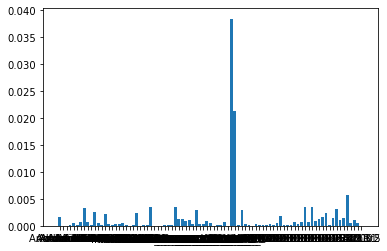

In [88]:
import matplotlib.pyplot as plt
plt.bar(freq['id_30'], freq['TransactionID'])

## Export pickle

In [128]:
import pickle

with open(os.path.join(DATA_DIR, 'train.pkl'), 'wb') as f:
    pickle.dump(X_train, f)
    
with open(os.path.join(DATA_DIR, 'test.pkl'), 'wb') as f:
    pickle.dump(X_test, f)